# Question 1
On peut utiliser un indicateur de dispersion, par exemple l'écart-type ou l'écart entre la valeur maximale et la valeur minimale. L'homogénéité d'une distribution continue se mesure par la dispersion.

# Question 2

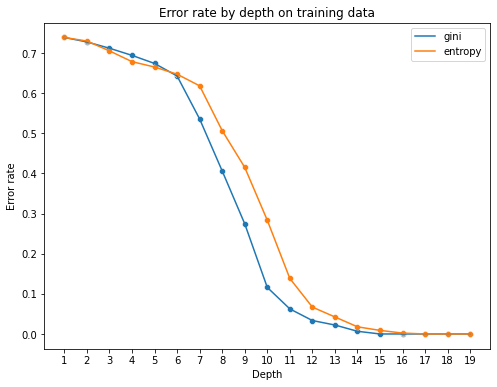

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tp_tree_source import *
from sklearn import tree

n=456
checkers = rand_checkers(n//4,n//4,n//4,n//4)
X_checkers = checkers[:,:-1]
y_checkers = checkers[:,-1]

entropy = list()
gini = list()
for i in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=i) #gini par défaut
    model = model.fit(X_checkers,y_checkers)
    gini.append(1-model.score(X_checkers,y_checkers))
    model = tree.DecisionTreeClassifier(max_depth=i,criterion="entropy")
    model = model.fit(X_checkers,y_checkers)
    entropy.append(1-model.score(X_checkers,y_checkers))

plt.figure(figsize=(8,6))
sns.lineplot(x=[str(x) for x in range(1,20)],y=gini,label="gini")
sns.lineplot(x=[str(x) for x in range(1,20)],y=entropy,label="entropy")
sns.scatterplot(x=[str(x) for x in range(1,20)],y=gini)
sns.scatterplot(x=[str(x) for x in range(1,20)],y=entropy)
plt.xlabel("Depth")
plt.ylabel("Error rate")
plt.title("Error rate by depth on training data")
plt.legend()
plt.show()

# Question 3

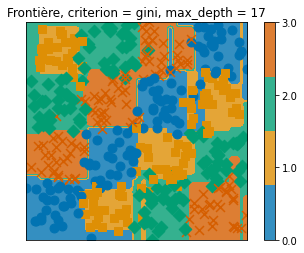

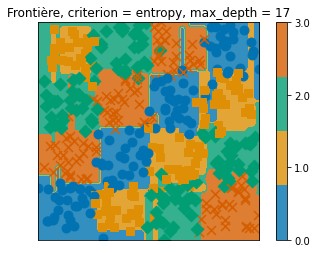

In [2]:
import numpy as np
from functools import partial

def speshulpredict(Xnew, model, X):
    """special function to work with frontiere_new from source file"""
    if not isinstance(Xnew,np.ndarray): #if X is a list
        Xnew = np.array(Xnew)
    Xnew = Xnew.reshape(-1,X.shape[1])
    return model.predict(Xnew)

earliest_depth_with_no_error = np.max([np.argmin(gini),np.argmin(entropy)])+1

modelgini = tree.DecisionTreeClassifier(max_depth=earliest_depth_with_no_error).fit(X_checkers,y_checkers)

frontiere_new(partial(speshulpredict, model=modelgini, X=X_checkers), X_checkers, y_checkers)
plt.title(f"Frontière, criterion = gini, max_depth = {earliest_depth_with_no_error}")
plt.show()

modelentropy = tree.DecisionTreeClassifier(criterion="entropy",max_depth=earliest_depth_with_no_error).fit(X_checkers,y_checkers)

frontiere_new(partial(speshulpredict, model=modelentropy, X=X_checkers), X_checkers, y_checkers)
plt.title(f"Frontière, criterion = entropy, max_depth = {earliest_depth_with_no_error}")
plt.show()

# Question 4

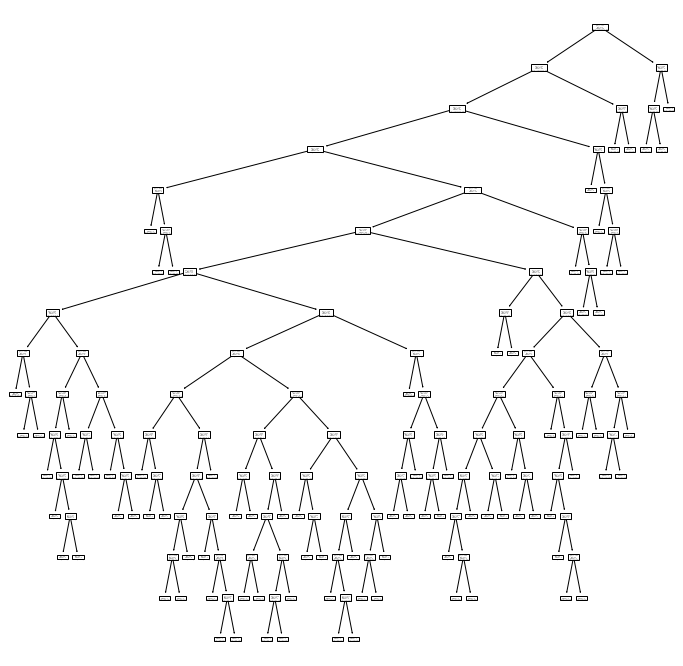

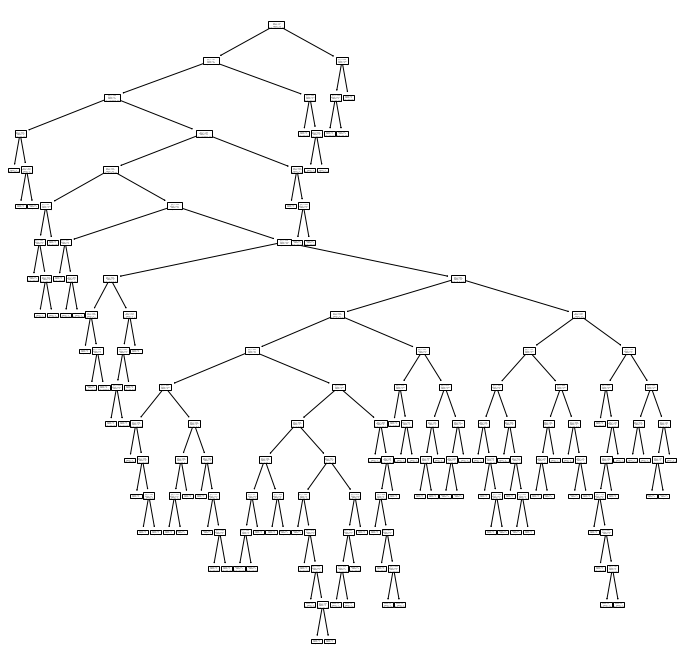

In [3]:
#tree.export_graphviz(modelgini,"./graphs/ginitree")
#tree.export_graphviz(modelentropy,"./graphs/entropytree")
plt.figure(figsize=(12,12))
tree.plot_tree(modelgini)
plt.show();
plt.figure(figsize=(12,12))
tree.plot_tree(modelentropy)
plt.show();

# Question 5

In [4]:
n=160
checkers = rand_checkers(n//4,n//4,n//4,n//4)
X_checkers_2 = checkers[:,:-1]
y_checkers_2 = checkers[:,-1]

print("Gini model on new data :")
print(1-modelgini.score(X_checkers_2,y_checkers_2))
print()
print("Entropy model on new data :")
print(1-modelentropy.score(X_checkers_2,y_checkers_2))

Gini model on new data :
0.19999999999999996

Entropy model on new data :
0.19374999999999998


# Questions 6 et 7

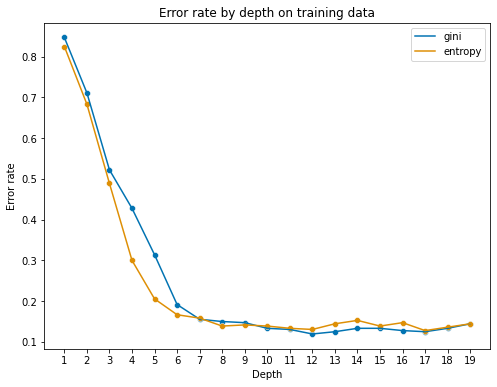

Cross validated best value of depth (averaged scores) :
76
Score of best model :
0.7919142680284741 ± 0.07104129104411179


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

digits = datasets.load_digits()

X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)

entropy = list()
gini = list()
for i in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=i) #gini par défaut
    model = model.fit(X_train,y_train)
    gini.append(1-model.score(X_test,y_test))
    model = tree.DecisionTreeClassifier(max_depth=i,criterion="entropy")
    model = model.fit(X_train,y_train)
    entropy.append(1-model.score(X_test,y_test))

plt.figure(figsize=(8,6))
sns.lineplot(x=[str(x) for x in range(1,20)],y=gini,label="gini")
sns.lineplot(x=[str(x) for x in range(1,20)],y=entropy,label="entropy")
sns.scatterplot(x=[str(x) for x in range(1,20)],y=gini)
sns.scatterplot(x=[str(x) for x in range(1,20)],y=entropy)
plt.xlabel("Depth")
plt.ylabel("Error rate")
plt.title("Error rate by depth on training data")
plt.legend()
plt.show()

scores = list()
train_scores = list()
marange = range(1,201,2)
for i in marange:
    model = tree.DecisionTreeClassifier(max_depth=i)
    scores.append(cross_val_score(model, X, y))
    model = model.fit(X,y)
    train_scores.append(model.score(X,y))

print("Cross validated best value of depth (averaged scores) :")
print(np.argmax(np.mean(np.array(scores),axis=1))+1)
print("Score of best model :")
print(f"{np.mean(scores[np.argmax(np.mean(np.array(scores),axis=1))])} ± {2*np.std(scores[np.argmax(np.mean(np.array(scores),axis=1))])}")

# Question 8

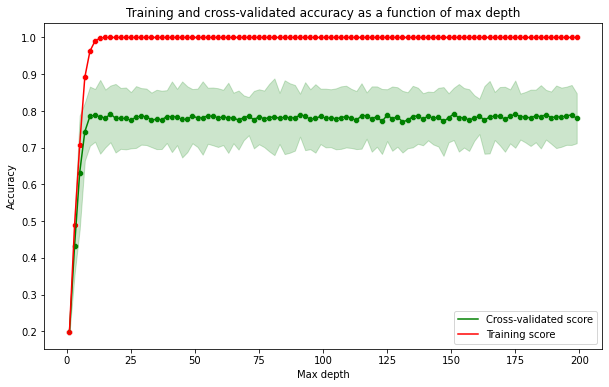

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(x=marange,y=np.mean(np.array(scores),axis=1),label="Cross-validated score",color="green")
sns.scatterplot(x=marange,y=np.mean(np.array(scores),axis=1),color="green")
plt.fill_between(x=marange,y1=np.mean(np.array(scores),axis=1)-2*np.std(np.array(scores),axis=1),y2=np.mean(np.array(scores),axis=1)+2*np.std(np.array(scores),axis=1),alpha=.2,color="green")
sns.lineplot(x=marange,y=train_scores,label="Training score",color="red")
sns.scatterplot(x=marange,y=train_scores,color="red")
plt.legend()
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Training and cross-validated accuracy as a function of max depth")
plt.show()